# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

# 1. Summary

In this assignment, you are tasked with the challenge of developing machine learning (ML) classifiers capable of categorizing grayscale images into predefined classes. Your task involves employing various classification algorithms to identify which is most effective and efficient in processing image data. Additionally, you are required to document your methodologies and findings in a detailed report. The total score for this assignment is allocated as follows:

1. Code: max 65 points
2. Report: max 35 points

Detailed about assignment specifcations and scoring criteria can be found in the assignment page on Canvas (Assignments $\rightarrow$ Assignment 1 - Specification). The sections below provide comprehensive information on the assignment tasks and guidelines for submission.

# 2. Dataset description


The dataset for this assignment is derived from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a collection of fashion articles represented as grayscale images. This dataset can be downloaded from Canvas. The dataset consists of a training set of 30,000 examples and a test set of 5,000 examples. They belong to 10 different categories. The validation set is not provided, but you can randomly pick a subset of the training set for validation. Your prediction over the test set must be submitted to Kaggle to receive the public accuracy over first 2,000 examples, you will use this accuracy to analyse the performance of your proposed method. It is NOT allowed to use any examples from the test set for training; or it will be considered as cheating. The rest 3,000 labels of the test set are reserved for marking purpose.

Data samples are categorized into the following ten classes:

- 0: T-shirt/Top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


Below are visual examples of the dataset, showcasing samples from each category:

<img src="https://www.researchgate.net/publication/346405197/figure/fig3/AS:962581560848384@1606508736352/Examples-of-Fashion-MNIST-dataset.ppm" alt="DataSet" title="DataSet" width=500/>

The dataset can be downloaded from the Assignment 1 page on Canvas. Note that only a subset of the original Fashion-MNIST dataset is provided for this assignment. You must use the specific files supplied in the assignment materials for training and testing.

# 3. Data Preparation

The required `data` files are in the data folder, downloadable as a zip from the Assignment 1 - Specification page on Canvas. Extract the files into your working directory. The folder includes:

- `train.csv`: 30,000 labeled samples for training, evaluation, and model selection.
- `test1.csv`: 2,000 labeled samples for model efficiency testing (Canvas submission).
- `test2.csv`: 5,000 unlabeled samples for Kaggle evaluation.
- `sample.csv`: A sample prediction file format for Kaggle submission (`test_output.csv`).

Use Python's pandas library to load these CSV files into DataFrames, ensuring they are under the `./data/` directory.

## 3.1 Loading data

Use the following Python code to load the training data:  

In [2]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['sample.csv', 'test1.csv', 'test2.csv', 'train.csv']


In [3]:
# train.csv including feature and label using for training model.
data_train_df = pd.read_csv('./data/train.csv') 

In [4]:
# print out the first 5 rows of the training dataframe
data_train_df.head()

,id,v1,v2,v3,v4,...,v781,v782,v783,v784,label
0,1,0,0,0,0,...,0,0,0,0,6
1,2,0,0,0,0,...,0,0,0,0,7
2,3,0,0,0,0,...,0,0,0,0,4
3,4,0,0,0,0,...,0,0,0,0,7
4,5,0,0,0,0,...,0,0,0,0,3


Then data would be a dataframe with 30,000 samples including 784 features (from v1 to v784) and its label.

In [5]:
# Selecting input feature
# image 28*28 = 784
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()

# Selecting output lable 
data_train_label = data_train_df.label.to_numpy()

Showing a sample data. The first example belongs to class 2: Pullover

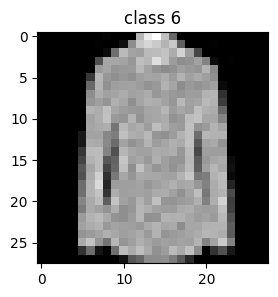

In [5]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.figure(figsize=(3,3))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]))
plt.show()

# 4. Task Description

## 4.1 Code

You will now explore and build diffferent ML models for the given dataset. You are required to implement at least **FOUR** models, which should include THREE from the following methods:

1. Nearest Neighbor
2. Logistic Regression
3. Naïve Bayes 
4. Decision Tree
5. SVM

and ONE of these ensemble methods:
    
 1. Bagging
 2. Boosting
 3. Random forest
    

For these implementations, you may use established packages and libraries that have been introduced in the tutorials such as sklearn or create your own custom solutions from scratch.

Your code must be easily readable and well commented. The following are expected to be satisfied:

- **Readability & Consistency**: Easy to read, and consistent in style
  
- **Coding Descriptions & Comments**: Descriptions and comments clarify meaning where needed
  
- **Robustness**: Handles erroneous or unexpected input 

It should follow the structure below.

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [6]:
# TODO: Install and import necessary libraries

# For preprocessing like Normalization and Dimensionality Reduction
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
import seaborn as sns

# For model 1 using KNN (Nearest neighbors model)
from sklearn.neighbors import KNeighborsClassifier

# For model 2 using Naive bayes

# For model 3 using SVM
from sklearn.svm import SVC

# For model 4 using Random Forest
from sklearn.ensemble import RandomForestClassifier


Define any necessary utility or helper functions (e.g., for plotting, optimization, etc.) if applicable.

In [7]:
# TODO: Define helper function (e.g. plotting) if applicable
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_cumulative_variance_ratio(X, n_components=None):
    """
    Draw a PCA diagram to explain the variance ratio.

    Args:
    X : array-like, shape (n_samples, n_features)
        
    n_components : int, optional
        The Main components needs to calculate (when to stop), None is default

    Return:
        int(average number of 95% and 99% components)
    """
    pca = PCA(n_components=n_components)
    pca.fit(X)
    
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Cumulative Explained Variance Ratio vs. Number of PCA Components')
    plt.grid(True)
    
    # Add a line to shows the 95% and 99% variance
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    plt.axhline(y=0.99, color='g', linestyle='--', label='99% Explained Variance')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # print the result to let user select which value they want to use
    components_95 = next(i for i, ratio in enumerate(cumulative_variance_ratio) if ratio >= 0.95) + 1
    components_99 = next(i for i, ratio in enumerate(cumulative_variance_ratio) if ratio >= 0.99) + 1
    
    print(f"need {components_95} components to explain the 95% of variance")
    print(f"need {components_99} components to explain the 99% of variance")

    return int((components_95 + components_99) / 2)


### 4.1.2 Data Preprocessing

Implement at least ONE preprocessing technique on the dataset before model training. Possible methods include **Normalization**, **Dimensionality Reduction**, etc.

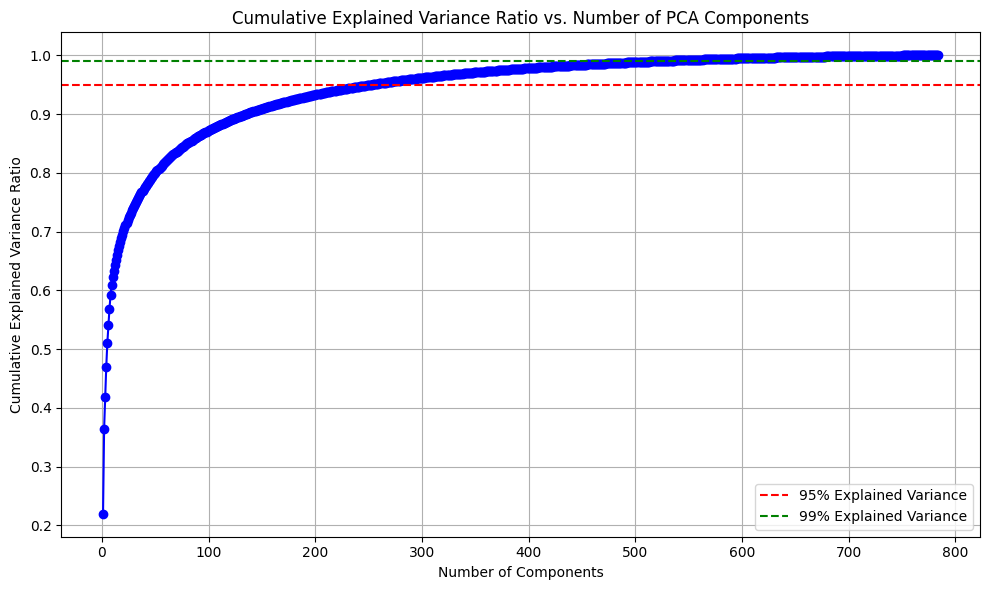

need 253 components to explain the 95% of variance
need 522 components to explain the 99% of variance
Using components 387 for PCA


In [9]:
# TODO: Implement Preprocessing Techniques

# Reload feature and label Since avoid 
data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
data_train_label = data_train_df.label.to_numpy()

# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data_train_feature, data_train_label, test_size=0.2, random_state=42)

# Normalization: Transforms the range of features to a standard scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Take a look for how many components should be set
components = plot_cumulative_variance_ratio(X_train_scaled)
print(f"Using components {components} for PCA")

# Dimensionality Reduction
pca = PCA(n_components=components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


### 4.1.3 Model 1

#### Implementation

Implement the initial version of your model using a set of predefined hyperparameters. This will establish a baseline from which improvements can be made.

In [79]:
# TODO: Implement model 1 KNN

# KNN hyperparameters 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# predict the split test value
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy of test set: {accuracy:.2f}")

accuracy of test set: 0.85


#### Hyper-parameters Tuning

Enhance your model by fine-tuning its hyperparameters. Use techniques such as grid search combined with k-fold cross-validation to systematically identify the optimal parameter set.

In [80]:
# TODO: Fine-tune the hyperparameters of model 1

# Data preprocessing and knn define in pipeline for grid_search
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Scaler, StanderdScaler
    ('pca', PCA(n_components=components)),    # PCA, Dimension reduction
    ('knn', KNeighborsClassifier())           # KNN model
])

# Define the hyperparameters for neighbors number, weights method, distence metric algorithm method
param_grid = {
    'knn__n_neighbors': [3, 9, 11, 17, 23, 57],              # KNN K-neighbors
    'knn__weights': ['uniform', 'distance'],                 # KNN weight method
    'knn__metric': ['euclidean', 'manhattan']                # distence metric method
}

# grid search with cross validation
# cv : Cross Validation number
# scoring : which value we focus for correctness of model
# n_jobs : how many CPU thread using, default -1 means using all threads
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print("Start Grid Search")
grid_search.fit(X_train, y_train)
print("Best Hyperparameter setting:", grid_search.best_params_)
print("Best cross validation score:", grid_search.best_score_)

# See the best model result
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Fine-tuned model's accuracy rate in testset':", test_score)

Start Grid Search
Best Hyperparameter setting: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best cross validation score: 0.8397916666666667
Fine-tuned model's accuracy rate in testset': 0.8486666666666667


### 4.1.4 Model 2

Implement and fine-tune the hyperparameters for Model 2 (using the same approach as Model 1). 

In [81]:
# TODO: Implement model 2

In [82]:
# TODO: Fine-tune the hyperparameters for model 2

### 4.1.5 Model 3

Implement and fine-tune the hyperparameters for Model 3. 

In [12]:
# TODO: Implement model 3 SVM

# Baseline SVM model parameter, using defualt RBF kernel as a performance target
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_pca, y_train)

y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial SVM accuracy on test set: {accuracy:.2f}")

Initial SVM accuracy on test set: 0.88


Fitting 5 folds for each of 2 candidates, totalling 10 fits
SVM Best parameter set: {'feature_selection__threshold': 'median', 'pca__n_components': 0.99, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
SVM best accuracy score: 0.8789166666666667
Fine-tuned SVM model performance in test dataset: 0.8898333333333334


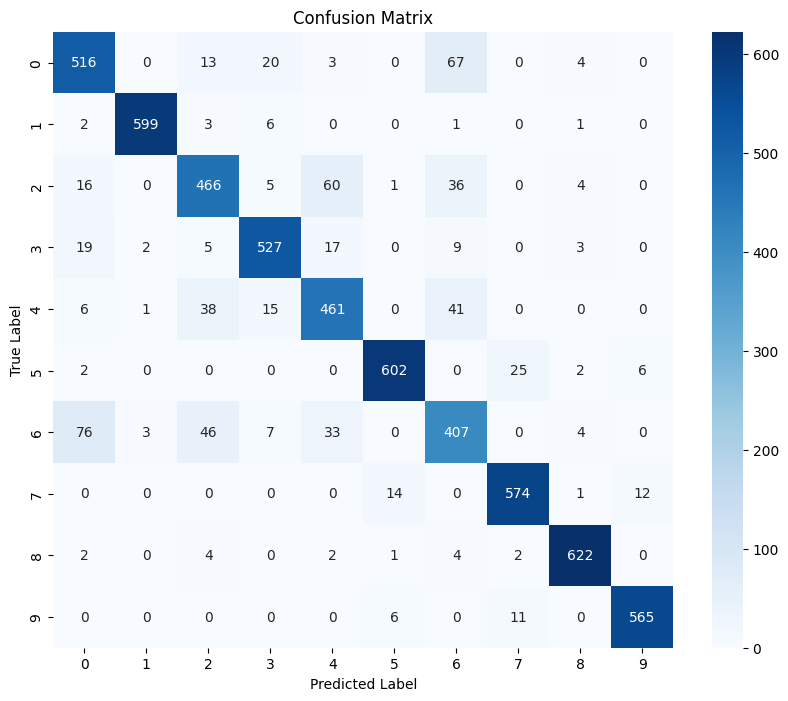

In [12]:
# TODO: Fine-tune the hyperparameters for model 3

# Pipeline for data preprocessing and SVM model setting
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    # ('feature_selection', SelectKBest(f_classif, k=500)),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=600, random_state=42))),
    ('pca', PCA(n_components=0.95, svd_solver='full')),
    ('svm', SVC(random_state=42))
])

# Define of grid search hyperparameter matrix
param_grid = {
    'feature_selection__threshold': ['mean', 'median'],
    'pca__n_components': [0.99],
    'svm__C': [10],                     # C, Control the punish of error in training
    'svm__kernel': ['rbf'],             # kernel, Map feature to a classification pattern
    'svm__gamma': ['scale'],      # gamma, each data's effect
}

# Start grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("SVM Best parameter set:", grid_search.best_params_)
print("SVM best accuracy score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Fine-tuned SVM model performance in test dataset:", test_score)

y_pred = best_model.predict(X_test)

# Draw confuse matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### 4.1.6 Model 4

Implement and fine-tune the hyperparameters for Model 4. 

In [85]:
# TODO: Implement model 4

In [86]:
# TODO: Fine-tune the hyperparameters for model 4

In [19]:
# For testing Preprocessing

# data_train_feature = data_train_df.loc[:, "v1":"v784"].to_numpy()
# data_train_label = data_train_df.label.to_numpy()

# data_train_feature = data_train_feature.reshape(X_train.shape[0], -1) / 255.0

# X_train, X_val, y_train, y_val = train_test_split(data_train_feature, data_train_label, test_size=0.1, random_state=42)

# # 创建和训练模型
# rf = RandomForestClassifier(n_estimators=1500, max_depth=None, random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)

# # 评估模型
# val_pred = rf.predict(X_val)
# val_accuracy = accuracy_score(y_val, val_pred)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# test_pred = rf.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_pred)
# print(f"Test Accuracy: {test_accuracy:.4f}")

ValueError: cannot reshape array of size 23520000 into shape (27000,newaxis)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
最佳参数: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
最佳交叉验证分数: 0.8662083333333334
测试集准确率: 0.8775

分类报告:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       623
           1       1.00      0.96      0.98       612
           2       0.77      0.77      0.77       588
           3       0.86      0.93      0.90       582
           4       0.76      0.82      0.79       562
           5       0.97      0.95      0.96       637
           6       0.71      0.62      0.66       576
           7       0.94      0.93      0.93       601
           8       0.96      0.98      0.97       637
           9       0.94      0.97      0.95       582

    accuracy                           0.88      6000
   macro avg       0.87      0.88      0.87      6000
weighted avg       0.88      0.88      0.88      6000



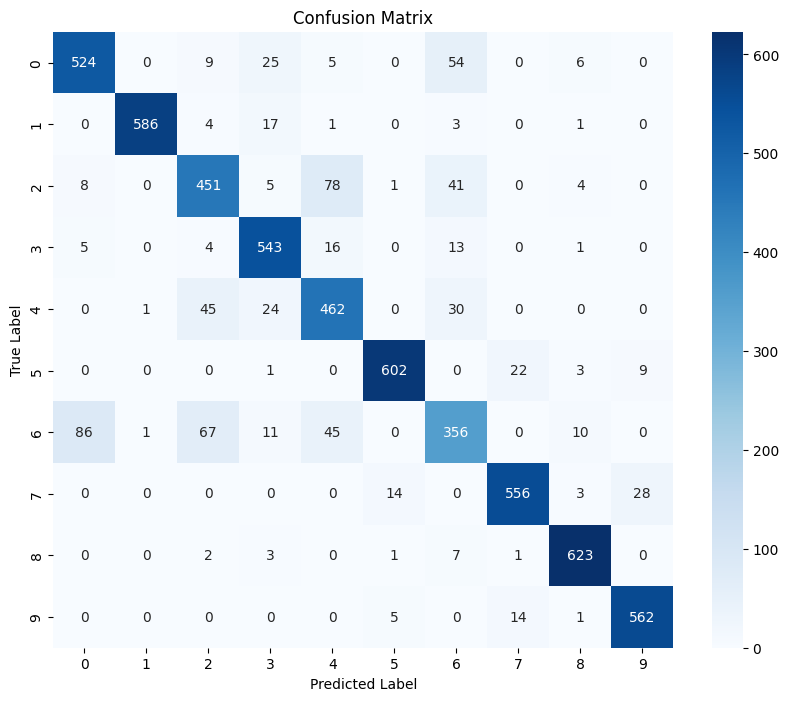

In [33]:
# # For testing
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# rf_base = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [600, 1000],
#     'max_depth': [None],
#     'min_samples_split': [5],
#     'min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# grid_search.fit(X_train_scaled, y_train)

# print("最佳参数:", grid_search.best_params_)
# print("最佳交叉验证分数:", grid_search.best_score_)
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test_scaled)

# accuracy = accuracy_score(y_test, y_pred)
# print(f"测试集准确率: {accuracy:.4f}")

# # 打印详细的分类报告
# print("\n分类报告:")
# print(classification_report(y_test, y_pred))

# plt.figure(figsize=(10, 8))
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

### 4.1.7 Evaluation

Evaluate the best version of each model using appropriate classification performance metrics on the validation set and test on `test1.csv`. Ensure that the results are visualized using high-quality plots, figures, or tables to clearly demonstrate model performance.

In [87]:
# TODO: Evaluate each model

### 4.1.8 Comparison

Compare all classifiers with their optimized hyper-parameters, focusing on criteria such as classification performance, training time, and inference time. Visualization of these comparisons is required; use high-quality plots, figures, or tables to facilitate a clear understanding of the differences and strengths of each model.

In [88]:
# TODO: Compare performance of all models

### 4.1.9 The Best Classifier

Conclude the best classifier

In [89]:
# TODO: Train and test the classifier which has the best performance

### 4.1.10 Loading testing data

Load the testing data for prediction

In [90]:
# test2.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./data/test2.csv', index_col=0)

In [91]:
# print out the first 5 rows of the test dataframe
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,1,0,2,...,0,0,0,0,0
5,0,0,0,0,0,...,0,0,0,0,0


Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [92]:
# TODO: Use your best classifier to make predictions on unseen data. The output of this code must be a vector named 'output' of length 5000

Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file. 

In [93]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',index_label="id")

NameError: name 'output' is not defined

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism. 

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions 

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code) 
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods. 

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!